In [372]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
power_play_info = pd.read_csv('../TrackingData/pp_info.csv')

In [26]:
power_play_info.head()

,game_name,penalty_number,start_video_clock_seconds,end_video_clock_seconds,start_period,end_period,start_game_clock_seconds,end_game_clock_seconds
0,2022-02-08 Canada at USA,1,1278,1314,1,1,386,350
1,2022-02-08 Canada at USA,2,1624,1744,1,1,216,96
2,2022-02-08 Canada at USA,3,409,562,2,2,991,871
3,2022-02-08 Canada at USA,4,898,898,2,2,613,613
4,2022-02-08 Canada at USA,5,1690,1927,2,2,272,152


In [32]:
# game_folders = []
# path = '../TrackingData'
# for thing in os.listdir(path):
#     if os.path.isdir(os.path.join(path, thing)):
#         game_folders.append(thing)

tracking_df = pd.DataFrame()

path = '../TrackingData/2022-02-08 Canada at USA'
m = re.search('\d{4}-\d{2}-\d{2}', path)
game_date = m.group(0)
m = re.search('2022-02-\d{2} ([A-Za-z]+ at [A-Za-z]+)', path)
away_team_at_home_team = m.group(1)
for filename in os.listdir(path):
    if re.match('2022-02', filename): # re.match only finds the pattern if it starts at the beginning of the string
        tracking_df = pd.read_csv(os.path.join(path, filename))
        tracking_df['game_date'] = [game_date]*len(tracking_df)

In [33]:
tracking_df

,frame_id,period,track_id,team_id,team_name,jersey_number,x_ft,y_ft,game_date
0,301,1,1,Light,Canada,6,171.071705,46.072340,2022-02-08
1,301,1,2,Dark,USA,2,194.278571,41.647639,2022-02-08
2,301,1,3,Dark,USA,37,194.258524,47.182641,2022-02-08
3,301,1,4,Light,Canada,11,202.732672,67.352362,2022-02-08
4,301,1,5,Dark,USA,28,174.116300,38.757970,2022-02-08
...,...,...,...,...,...,...,...,...,...
6419,1068,1,42,Light,Canada,100,181.835108,66.664795,2022-02-08
6420,1068,1,25,Dark,USA,19,185.358354,50.009070,2022-02-08
6421,1068,1,48,Light,Canada,100,202.806525,54.581122,2022-02-08
6422,1068,1,49,Dark,USA,5,190.454145,53.172723,2022-02-08


In [297]:
pbp_df = pd.read_csv('../pxp_womens_oly_2022_v2.csv')
pbp_df['game_date'] = pbp_df.game_date.apply(lambda x: str.replace(x, '/', '-'))
pbp_df['game_date'] = pd.to_datetime(pbp_df.game_date, format='%d-%m-%Y').dt.date

In [298]:
pbp_df.loc[(pbp_df.game_date == pd.to_datetime('2022-02-08').date()) & pbp_df.team_name.str.contains('United')]

,game_date,season_year,team_name,opp_team_name,venue,period,clock_seconds,situation_type,goals_for,goals_against,player_name,event,event_successful,x_coord,y_coord,event_type,player_name_2,x_coord_2,y_coord_2,event_detail_1,event_detail_2,event_detail_3
4,2022-02-08,2021,Olympic (Women) - United States,Olympic (Women) - Canada,home,1,1194,5 on 5,0,0,Lee Stecklein,Puck Recovery,t,6,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-02-08,2021,Olympic (Women) - United States,Olympic (Women) - Canada,home,1,1193,5 on 5,0,0,Lee Stecklein,Play,t,5,67,Indirect,Hilary Knight,39.0,3.0,NaN,NaN,NaN
6,2022-02-08,2021,Olympic (Women) - United States,Olympic (Women) - Canada,home,1,1190,5 on 5,0,0,Lee Stecklein,Puck Recovery,t,10,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-02-08,2021,Olympic (Women) - United States,Olympic (Women) - Canada,home,1,1189,5 on 5,0,0,Lee Stecklein,Play,t,8,14,Direct,Cayla Barnes,3.0,48.0,NaN,NaN,NaN
13,2022-02-08,2021,Olympic (Women) - United States,Olympic (Women) - Canada,home,1,1172,5 on 5,0,0,Kendall Coyne Schofield,Puck Recovery,t,5,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,2022-02-08,2021,Olympic (Women) - United States,Olympic (Women) - Canada,home,3,34,6 on 5,2,4,Megan Keller,Puck Recovery,t,166,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1817,2022-02-08,2021,Olympic (Women) - United States,Olympic (Women) - Canada,home,3,17,6 on 5,2,4,Hannah Brandt,Puck Recovery,t,3,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,2022-02-08,2021,Olympic (Women) - United States,Olympic (Women) - Canada,home,3,16,6 on 5,2,4,Hannah Brandt,Play,f,3,42,Indirect,Hilary Knight,66.0,80.0,NaN,NaN,NaN
1822,2022-02-08,2021,Olympic (Women) - United States,Olympic (Women) - Canada,home,3,5,6 on 5,2,4,Cayla Barnes,Puck Recovery,t,2,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
def get_game_pbp(pbp_data, game_date, away_team_at_home_team):
    game_date = pd.to_datetime(game_date).date()
    
    away_team_at_home_team = away_team_at_home_team.replace('USA', 'United States')

    m = re.search('(.+)\sat\s(.+)', away_team_at_home_team)
    away_team = m.group(1)
    home_team = m.group(2)
    

    pbp_data['team_name'] = pbp_data.team_name.str.replace('Olympic (Women) - ', '', regex=False)
    pbp_data['opp_team_name'] = pbp_data.opp_team_name.str.replace('Olympic (Women) - ', '', regex=False)

    return pbp_df.loc[(pbp_df['game_date'] == pd.to_datetime(game_date).date()) & (pbp_df.team_name.str.contains('|'.join([away_team, home_team])))]

In [312]:
game_pbp = get_game_pbp(pbp_df, game_date, away_team_at_home_team)
game_pbp

,game_date,season_year,team_name,opp_team_name,venue,period,clock_seconds,situation_type,goals_for,goals_against,player_name,event,event_successful,x_coord,y_coord,event_type,player_name_2,x_coord_2,y_coord_2,event_detail_1,event_detail_2,event_detail_3
0,2022-02-08,2021,Canada,United States,away,1,1200,5 on 5,0,0,Marie-Philip Poulin,Faceoff Win,t,100,42,Backhand,Hannah Brandt,NaN,NaN,NaN,NaN,NaN
1,2022-02-08,2021,Canada,United States,away,1,1199,5 on 5,0,0,Jocelyne Larocque,Puck Recovery,t,86,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-08,2021,Canada,United States,away,1,1198,5 on 5,0,0,Jocelyne Larocque,Dump In/Out,f,96,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-08,2021,Canada,United States,away,1,1197,5 on 5,0,0,Jocelyne Larocque,Zone Entry,t,124,1,Dumped,Cayla Barnes,NaN,NaN,NaN,NaN,NaN
4,2022-02-08,2021,United States,Canada,home,1,1194,5 on 5,0,0,Lee Stecklein,Puck Recovery,t,6,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-02-08,2021,Canada,United States,away,3,9,5 on 6,4,2,Erin Ambrose,Dump In/Out,f,63,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1822,2022-02-08,2021,United States,Canada,home,3,5,6 on 5,2,4,Cayla Barnes,Puck Recovery,t,2,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,2022-02-08,2021,United States,Canada,home,3,4,6 on 5,2,4,Cayla Barnes,Dump In/Out,f,10,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,2022-02-08,2021,Canada,United States,away,3,2,5 on 6,4,2,Sarah Nurse,Puck Recovery,t,157,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
power_play_info.loc[power_play_info.game_name.str.contains(game_date) & power_play_info.game_name.str.contains(away_team_at_home_team)]

,game_name,penalty_number,start_video_clock_seconds,end_video_clock_seconds,start_period,end_period,start_game_clock_seconds,end_game_clock_seconds
0,2022-02-08 Canada at USA,1,1278,1314,1,1,386,350
1,2022-02-08 Canada at USA,2,1624,1744,1,1,216,96
2,2022-02-08 Canada at USA,3,409,562,2,2,991,871
3,2022-02-08 Canada at USA,4,898,898,2,2,613,613
4,2022-02-08 Canada at USA,5,1690,1927,2,2,272,152
5,2022-02-08 Canada at USA,6,1081,1146,3,3,545,480
6,2022-02-08 Canada at USA,7,1837,1957,3,3,157,37


In [252]:
def get_power_play_events(game_pbp, pp_number):
    power_play_info = pd.read_csv('../TrackingData/pp_info.csv')

    game_date = game_pbp.game_date.iloc[0]
    team1 = game_pbp.team_name.iloc[0]
    team2 = game_pbp.opp_team_name.iloc[0]
    if team1 == 'United States':
        team1 = 'USA'
    elif team2 == 'United States':
        team2 = 'USA'

    pp_info = power_play_info.loc[(power_play_info.game_name == f'{game_date} {team1} at {team2}') | (power_play_info.game_name == f'{game_date} {team2} at {team1}')]

    pp_start = int(pp_info.start_game_clock_seconds.loc[pp_info.penalty_number == pp_number])
    pp_end = int(pp_info.end_game_clock_seconds.loc[pp_info.penalty_number == pp_number])

    return game_pbp.loc[(game_pbp.clock_seconds <= pp_start) & (game_pbp.clock_seconds <= pp_end)]

In [313]:
pp_df = get_power_play_events(game_pbp, 1)
pp_df

,game_date,season_year,team_name,opp_team_name,venue,period,clock_seconds,situation_type,goals_for,goals_against,player_name,event,event_successful,x_coord,y_coord,event_type,player_name_2,x_coord_2,y_coord_2,event_detail_1,event_detail_2,event_detail_3
454,2022-02-08,2021,Canada,United States,away,1,350,5 on 5,1,0,Blayre Turnbull,Faceoff Win,t,100,42,Forehand,Kelly Pannek,NaN,NaN,NaN,NaN,NaN
455,2022-02-08,2021,Canada,United States,away,1,350,5 on 5,1,0,Jocelyne Larocque,Puck Recovery,t,85,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,2022-02-08,2021,Canada,United States,away,1,348,5 on 5,1,0,Jocelyne Larocque,Dump In/Out,f,103,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,2022-02-08,2021,Canada,United States,away,1,348,5 on 5,0,1,Jocelyne Larocque,Zone Entry,t,125,3,Dumped,Megan Bozek,NaN,NaN,NaN,NaN,NaN
458,2022-02-08,2021,United States,Canada,home,1,345,5 on 5,0,1,Maddie Rooney,Puck Recovery,t,2,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-02-08,2021,Canada,United States,away,3,9,5 on 6,4,2,Erin Ambrose,Dump In/Out,f,63,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1822,2022-02-08,2021,United States,Canada,home,3,5,6 on 5,2,4,Cayla Barnes,Puck Recovery,t,2,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,2022-02-08,2021,United States,Canada,home,3,4,6 on 5,2,4,Cayla Barnes,Dump In/Out,f,10,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,2022-02-08,2021,Canada,United States,away,3,2,5 on 6,4,2,Sarah Nurse,Puck Recovery,t,157,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
player1 = tracking_df.loc[tracking_df.track_id == 1]
player1

,frame_id,period,track_id,team_id,team_name,jersey_number,x_ft,y_ft,game_date
0,301,1,1,Light,Canada,6,171.071705,46.072340,2022-02-08
7,302,1,1,Light,Canada,6,171.483971,46.317792,2022-02-08
14,303,1,1,Light,Canada,6,171.717248,46.697785,2022-02-08
21,304,1,1,Light,Canada,6,171.857858,47.065520,2022-02-08
28,305,1,1,Light,Canada,6,172.080412,47.089239,2022-02-08
...,...,...,...,...,...,...,...,...,...
545,375,1,1,Light,Canada,6,168.710485,59.873519,2022-02-08
553,376,1,1,Light,Canada,6,168.336926,59.637272,2022-02-08
562,377,1,1,Light,Canada,6,168.318223,59.457061,2022-02-08
571,378,1,1,Light,Canada,6,168.242000,59.366841,2022-02-08


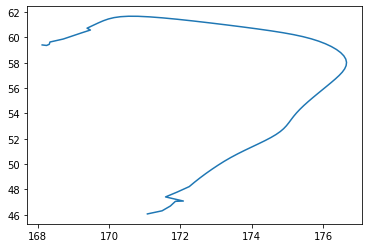

In [323]:
plt.plot(player1.x_ft, player1.y_ft)

In [324]:
tracking_df.track_id.unique()

array([ 1,  2,  3,  4,  5,  7,  8,  9, 11, 12, 13, 16, 18, 22, 23, 25, 26,
       28, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49, 50, 52, 53,
       56, 57, 59])

In [338]:
tracking_df.loc[tracking_df.team_id == 'Light'].jersey_number.unique()

array([  6,  11, 100,  23])

In [339]:
tracking_df.loc[tracking_df.team_id == 'Dark'].jersey_number.unique()

array([  2,  37,  28,   5,  26,  23, 100,   3,  10,  19])

In [361]:
tracking_df.loc[tracking_df.track_id == 2]

,frame_id,period,track_id,team_id,team_name,jersey_number,x_ft,y_ft,game_date
1,301,1,2,Dark,USA,2,194.278571,41.647639,2022-02-08
8,302,1,2,Dark,USA,2,193.973504,41.855582,2022-02-08
15,303,1,2,Dark,USA,2,193.805008,41.974374,2022-02-08
22,304,1,2,Dark,USA,2,193.245756,42.173449,2022-02-08
29,305,1,2,Dark,USA,2,193.205160,42.009767,2022-02-08
...,...,...,...,...,...,...,...,...,...
6381,1064,1,2,Dark,USA,2,189.293167,47.750812,2022-02-08
6390,1065,1,2,Dark,USA,2,189.249580,47.581072,2022-02-08
6399,1066,1,2,Dark,USA,2,189.060862,47.606665,2022-02-08
6408,1067,1,2,Dark,USA,2,188.987555,47.633341,2022-02-08


<AxesSubplot:xlabel='x_ft'>

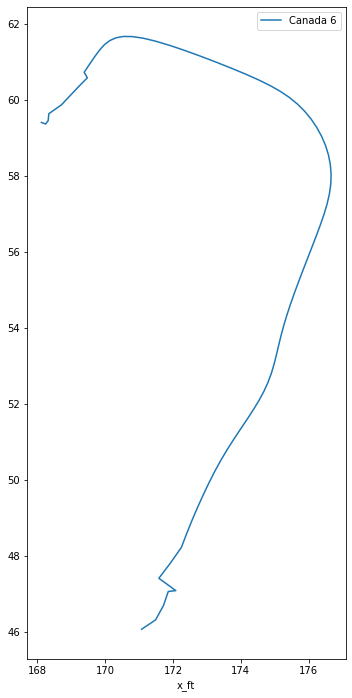

In [394]:
curve1 = tracking_df.loc[tracking_df.track_id == 1]
player1 = ' '.join([curve1.team_name.iloc[0], str(curve1.jersey_number.iloc[0])])
# curve1
curve1.plot('x_ft', 'y_ft', label=player1)

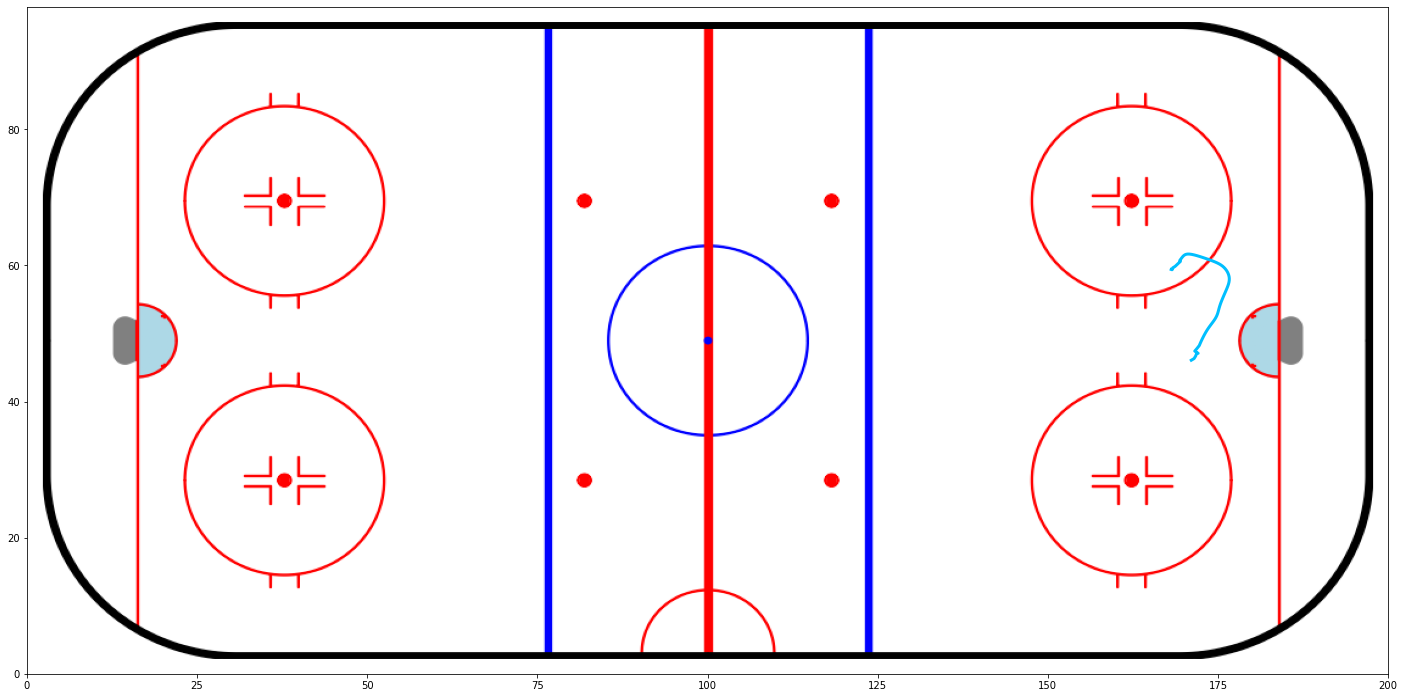

In [416]:
def plot_player_trail(tracking_df, tracking_id):
    curve = tracking_df.loc[tracking_df.track_id == tracking_id]
    player = ' '.join([curve.team_name.iloc[0], str(curve.jersey_number.iloc[0])])

    # return curve.plot('x_ft', 'y_ft', label=player)

    plt.rcParams['figure.figsize'] = (20, 9.8)
    plt.rcParams['figure.autolayout'] = True
    fig, ax = plt.subplots()
    im = plt.imread('../TrackingData/iihf-rink.png')
    im = ax.imshow(im, extent=[0, 200, 0, 98])

    if curve.team_id.iloc[0] == 'Dark':
        team_color = 'dimgray'
    elif curve.team_id.iloc[0] == 'Light':
        team_color = 'deepskyblue'

    ax.plot(curve.x_ft, curve.y_ft, linewidth=3, color=team_color)

    plt.show()


plot_player_trail(tracking_df, 1)

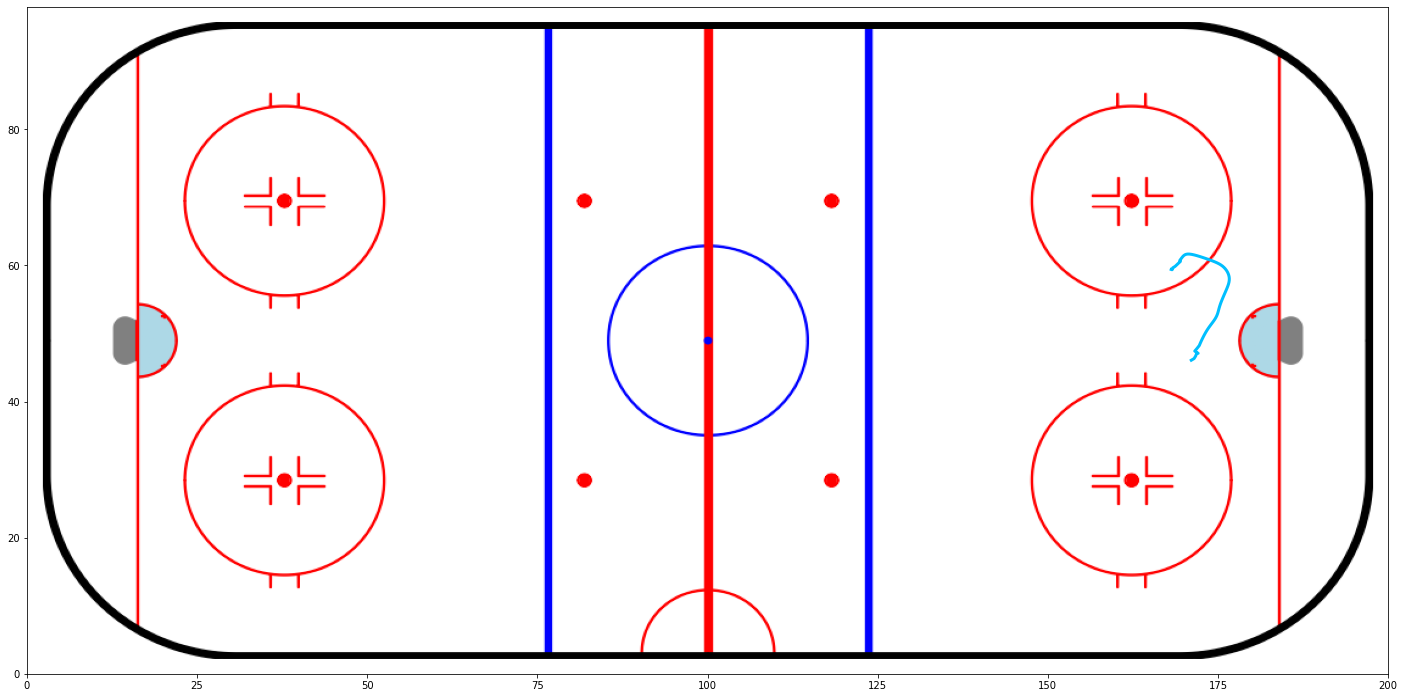

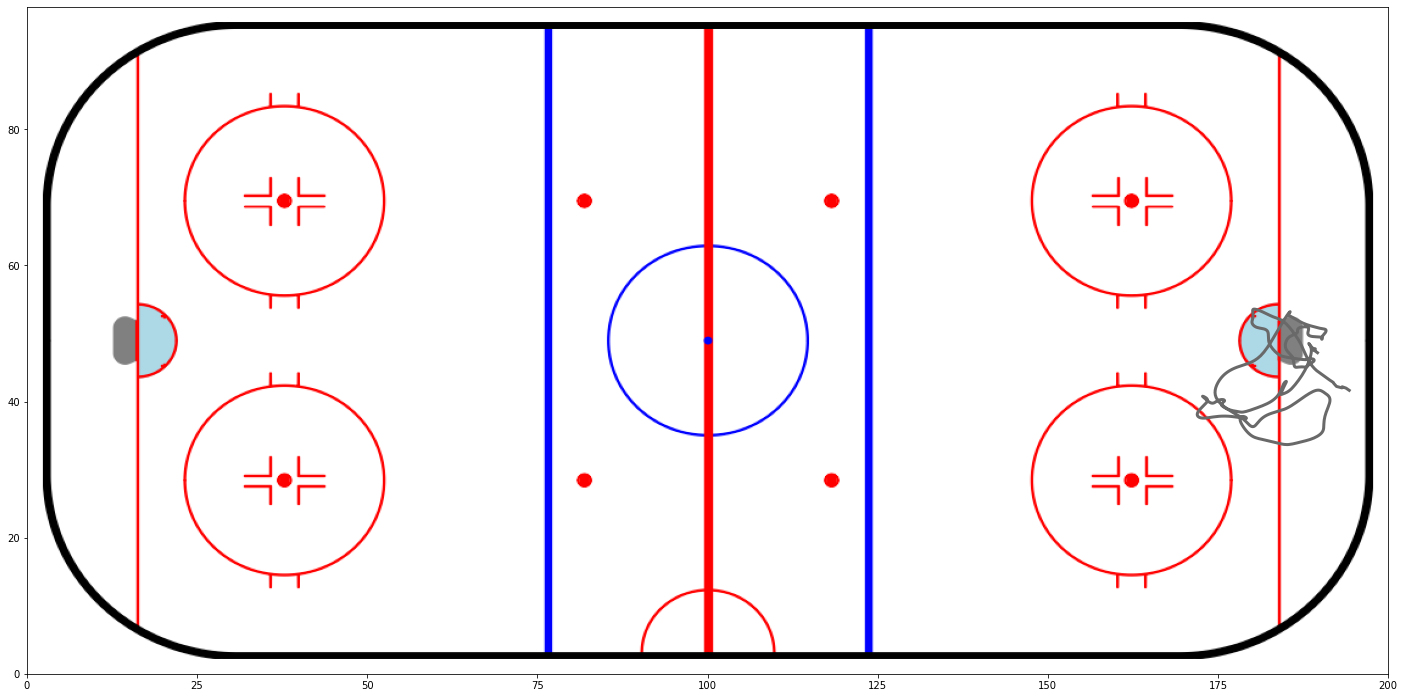

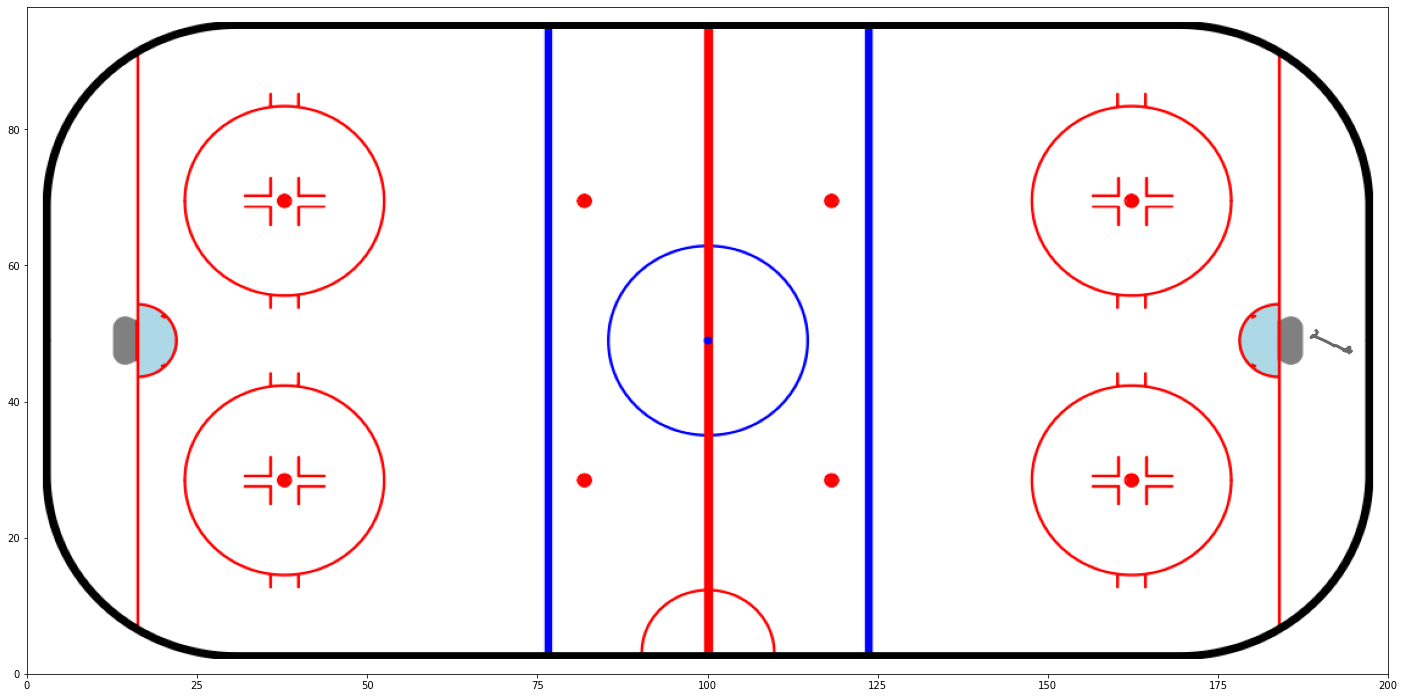

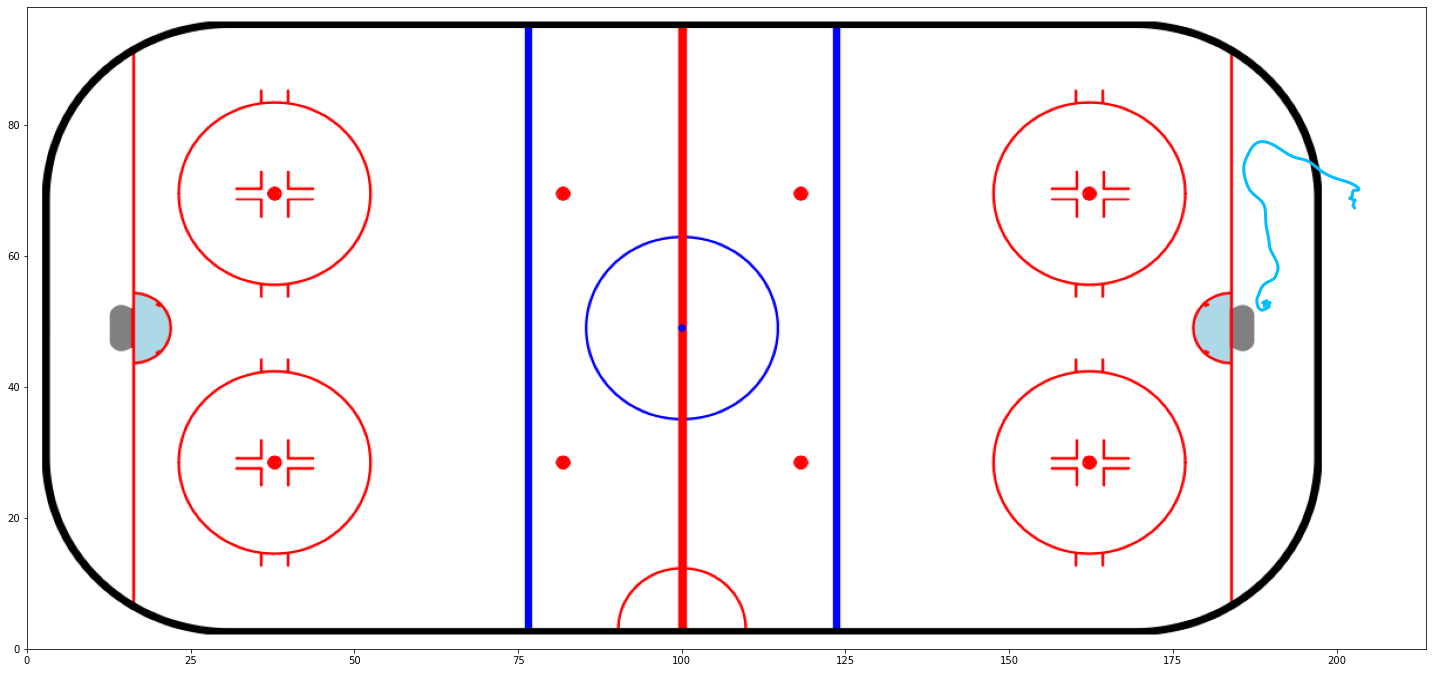

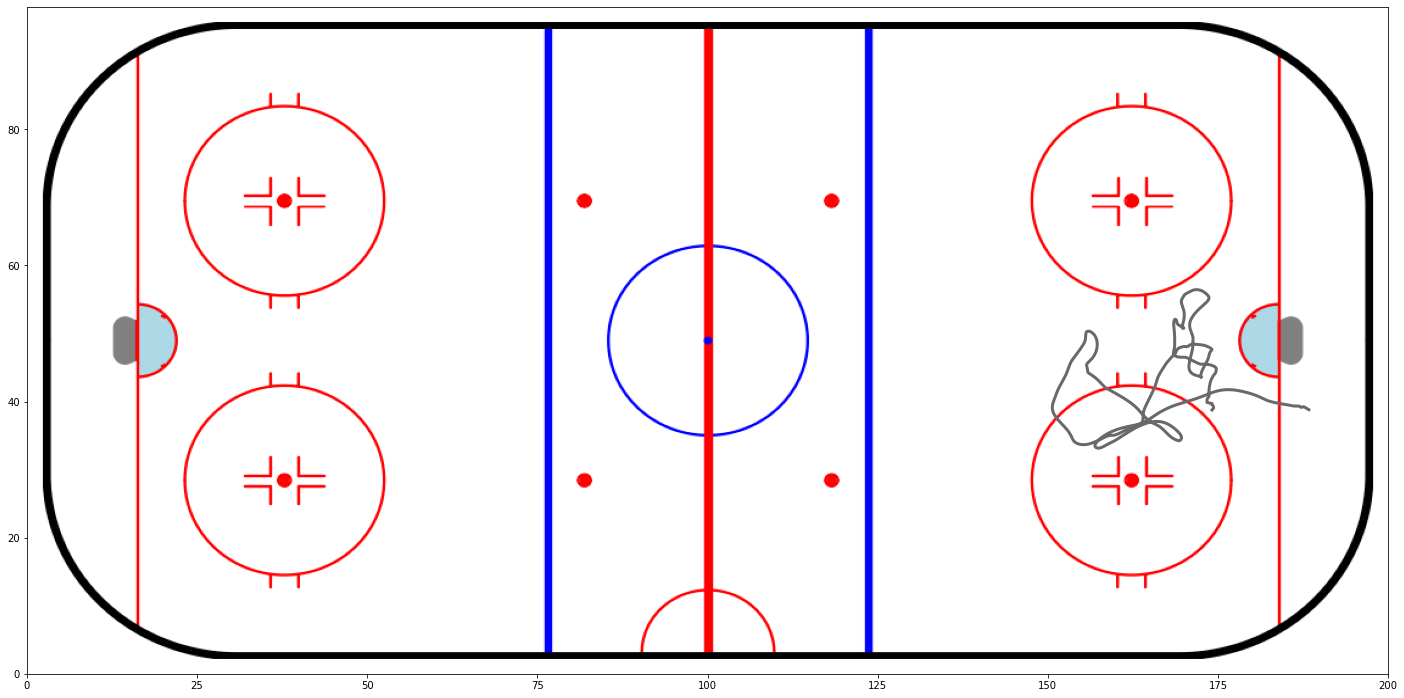

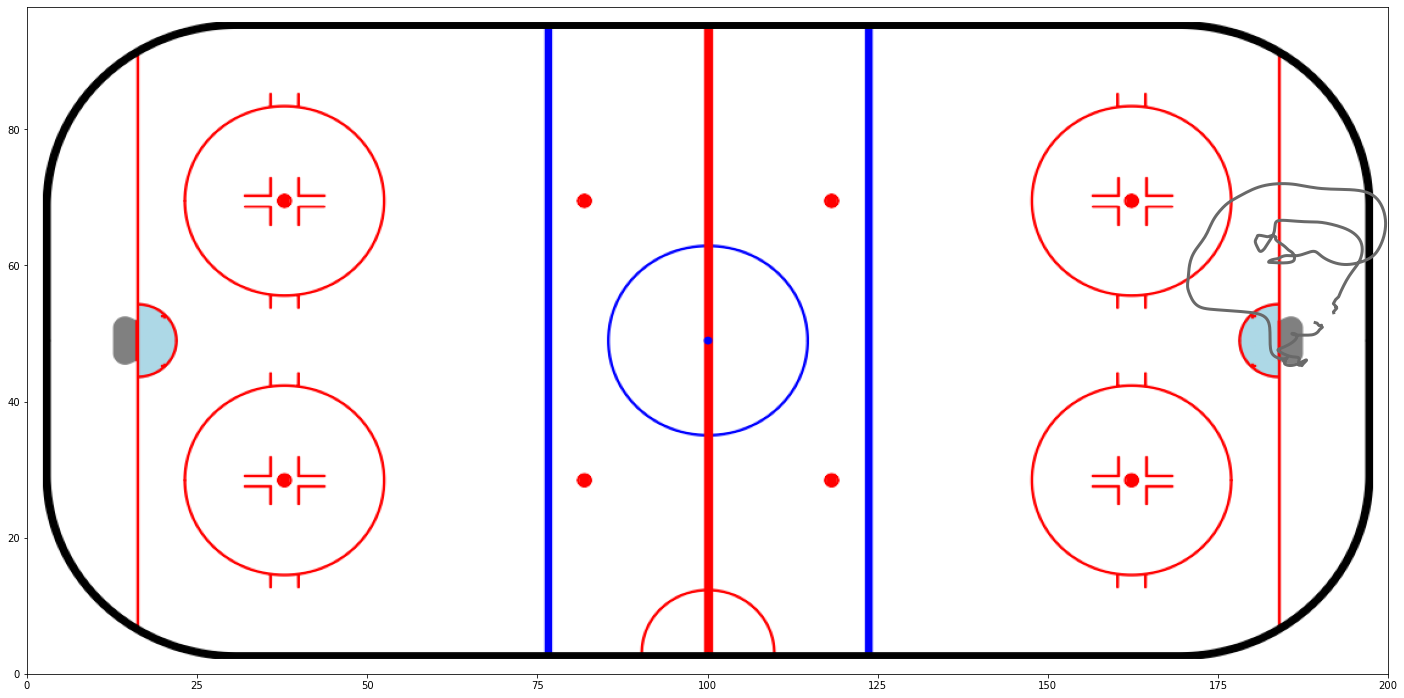

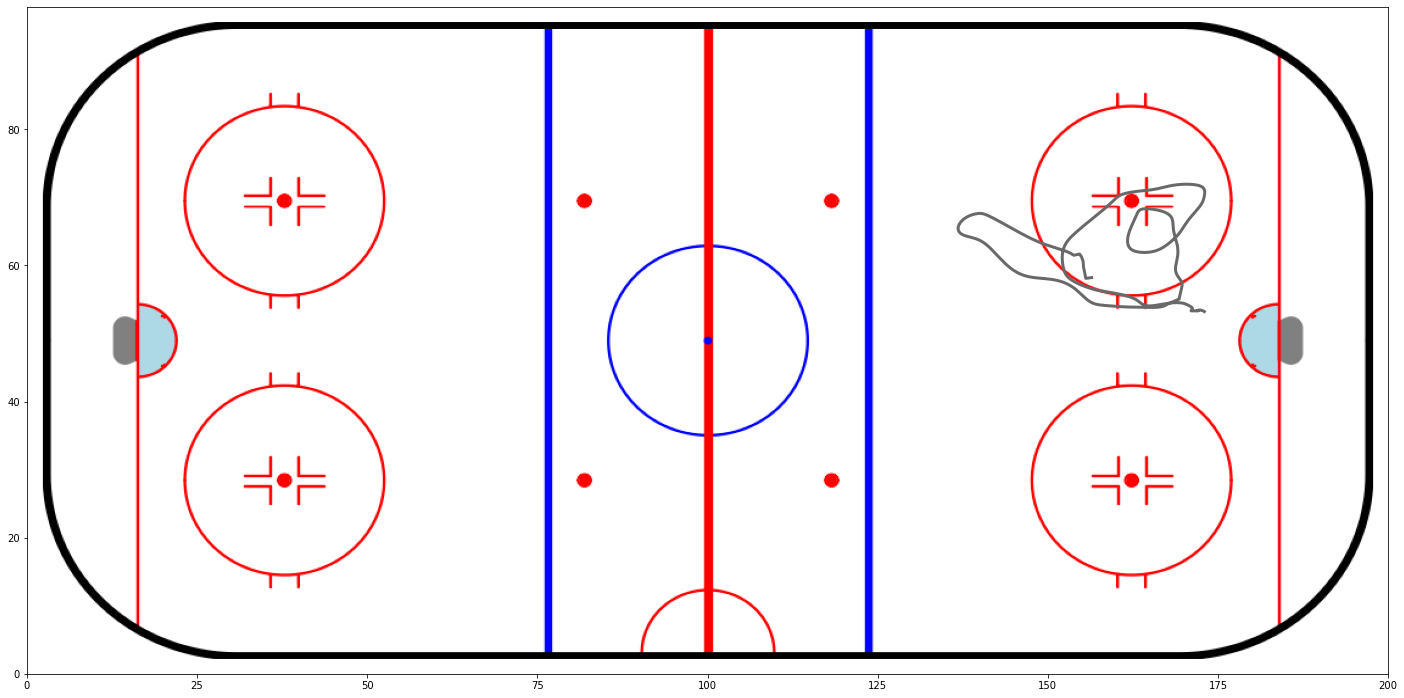

In [424]:
for tracking_id in tracking_df.iloc[:10].track_id.unique():

    plot_player_trail(tracking_df, tracking_id)